In [1]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten

2023-05-03 10:55:58.288736: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 10:56:00.343943: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 10:56:00.345958: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 10:56:11.317538: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


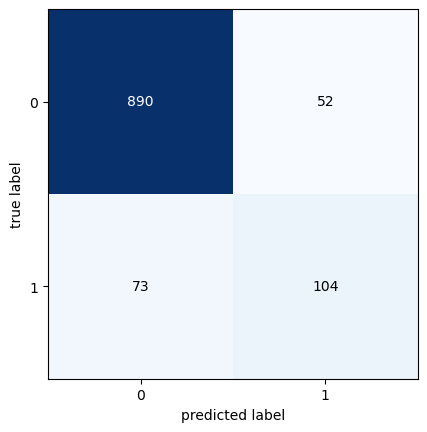

In [2]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


binary1 = np.array([[890, 52],
                    [73, 104]])

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

In [3]:
 train_ds = keras.utils.image_dataset_from_directory(
    directory='/home/dagar/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 3350 files belonging to 2 classes.


In [4]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/home/dagar/val',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 410 files belonging to 2 classes.


In [5]:
# Define the image preprocessing function
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
# Apply preprocessing to the train and validation sets
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
#create the model architecture

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
# Define early stopping and model checkpoint callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = "val_accuracy", min_delta=0.01 , patience = 6 , verbose = 1, mode = 'max')
 
mc = ModelCheckpoint(monitor = "val_accuracy", filepath ='./bestmodel.h5', verbose=1 , save_best_only=True, mode = 'max')

cd = [es,mc]

In [9]:
# Train the model
history = model.fit(train_ds,epochs=10,validation_data= validation_ds,callbacks=cd)

Epoch 1/10


2023-05-03 10:56:32.557931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3350]
	 [[{{node Placeholder/_4}}]]
2023-05-03 10:56:32.558665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3350]
	 [[{{node Placeholder/_0}}]]


105/105 [==============================] - ETA: 0s - loss: 0.2763 - accuracy: 0.9072

2023-05-03 11:03:17.759112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [410]
	 [[{{node Placeholder/_4}}]]
2023-05-03 11:03:17.759705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [410]
	 [[{{node Placeholder/_4}}]]



Epoch 1: val_accuracy improved from -inf to 0.97073, saving model to ./bestmodel.h5
105/105 [==============================] - 420s 4s/step - loss: 0.2763 - accuracy: 0.9072 - val_loss: 0.1059 - val_accuracy: 0.9707
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.1003 - accuracy: 0.9639
Epoch 2: val_accuracy improved from 0.97073 to 0.97805, saving model to ./bestmodel.h5
105/105 [==============================] - 398s 4s/step - loss: 0.1003 - accuracy: 0.9639 - val_loss: 0.0852 - val_accuracy: 0.9780
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 0.0819 - accuracy: 0.9719
Epoch 3: val_accuracy did not improve from 0.97805
105/105 [==============================] - 426s 4s/step - loss: 0.0819 - accuracy: 0.9719 - val_loss: 0.0680 - val_accuracy: 0.9756
Epoch 4/10
105/105 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.9809
Epoch 4: val_accuracy did not improve from 0.97805
105/105 [==============================] -

In [10]:
model.metrics_names

['loss', 'accuracy']

In [11]:
# Here the best epoch will be used.

model.load_weights('/home/dagar/bestmodel.h5')

val_loss, val_acc = model.evaluate(validation_ds)

print('val_loss:', val_loss)
print('val_acc:', val_acc)



13/13 [==============================] - 9s 608ms/step - loss: 0.0467 - accuracy: 0.9854
val_loss: 0.046739790588617325
val_acc: 0.9853658676147461


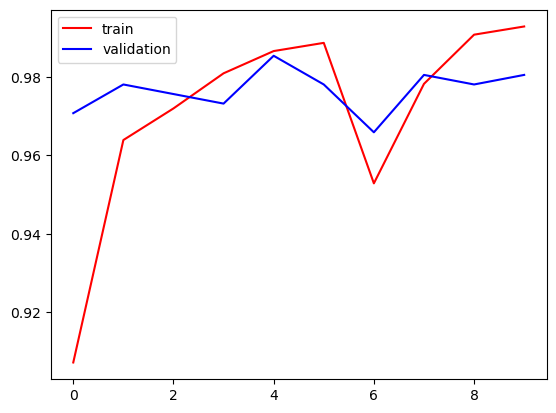

In [12]:
# Plot the Training Curves
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label= 'train')
plt.plot(history.history['val_accuracy'],color='blue',label= 'validation')
plt.legend()
plt.show()

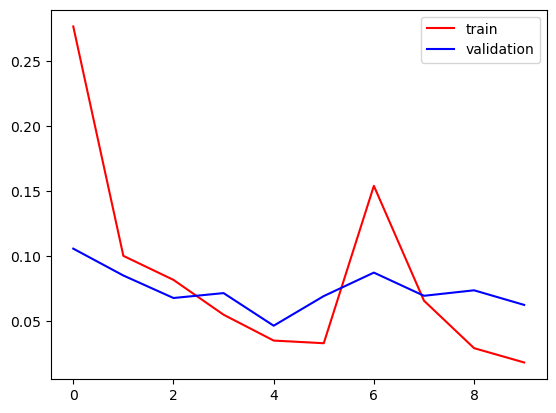

In [13]:
# Plot the Training Curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label= 'train')
plt.plot(history.history['val_loss'],color='blue',label= 'validation')
plt.legend()
plt.show()

In [14]:
# print accuracy
acc = model.evaluate(validation_ds)[1]
print(f"the accuracy of our model is {acc*100}%")


13/13 [==============================] - 10s 617ms/step - loss: 0.0467 - accuracy: 0.9854
the accuracy of our model is 98.53658676147461%


##Predicted confussion matrix on validation data

/tmp/ipykernel_4409/3638097809.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_true = np.concatenate([y for x, y in validation_ds], axis=0).astype(np.int)


13/13 [==============================] - 10s 656ms/step


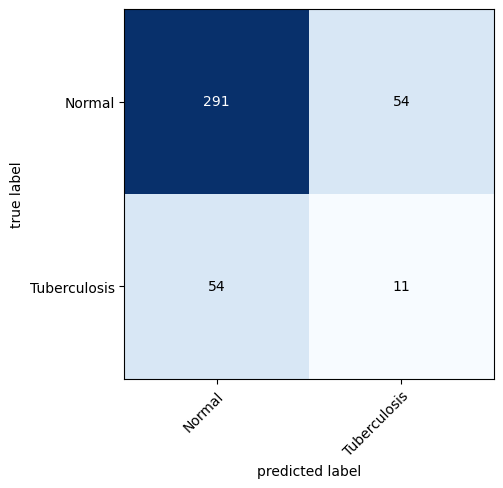

In [41]:
# Get the true labels for the validation set
y_true = np.concatenate([y for x, y in validation_ds], axis=0).astype(np.int)

# Predict the labels for the validation set
y_pred = model.predict(validation_ds)
y_pred = np.where(y_pred > 0.5, 1, 0)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the class labels
class_names = ['Normal', 'Tuberculosis']

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=class_names)
plt.show()


In [40]:
# Finding precision and recall
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy   :", accuracy)

Accuracy   : 0.7268292682926829


##perfect matrix

/tmp/ipykernel_4409/1699750470.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_true = np.concatenate([y for x, y in validation_ds], axis=0).astype(np.int)


13/13 [==============================] - 11s 716ms/step


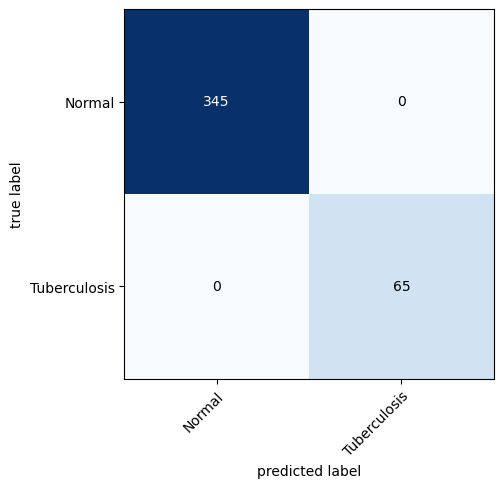

In [42]:
# Get the true labels for the validation set
y_true = np.concatenate([y for x, y in validation_ds], axis=0).astype(np.int)

# Predict the labels for the validation set
y_pred = model.predict(validation_ds)
y_pred = np.where(y_pred > 0.5, 1, 0)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_true)

# Define the class labels
class_names = ['Normal', 'Tuberculosis']

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=class_names)
plt.show()


#Confussion matrix of Train data

105/105 [==============================] - 80s 750ms/step


/tmp/ipykernel_4409/711716886.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = model.predict(train_ds).round().astype(np.int)
/tmp/ipykernel_4409/711716886.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

(3350,) (3350, 1)


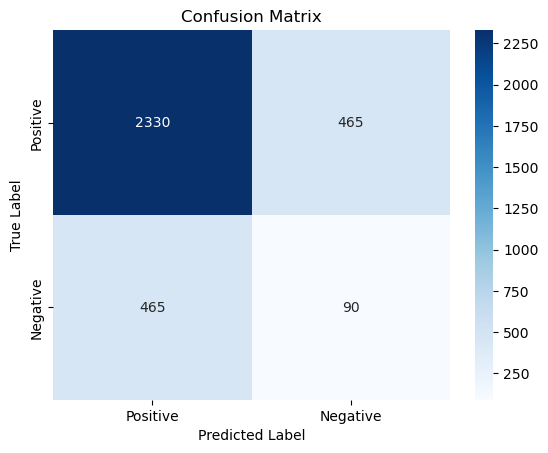

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the validation set
y_pred = model.predict(train_ds).round().astype(np.int)
# Get the true labels for the validation set
y_true = np.concatenate([y for x, y in train_ds], axis=0).astype(np.int)
print(y_true.shape, y_pred.shape)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the class labels
class_names = ['Positive', 'Negative']

# Plot the heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names, ax=ax)

# Set the axis labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [33]:
# Finding precision and recall
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy   :", accuracy)

Accuracy   : 0.7223880597014926


105/105 [==============================] - 80s 751ms/step


/tmp/ipykernel_4409/2256062892.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = model.predict(train_ds).round().astype(np.int)
/tmp/ipykernel_4409/2256062892.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprec

(3350,) (3350, 1)


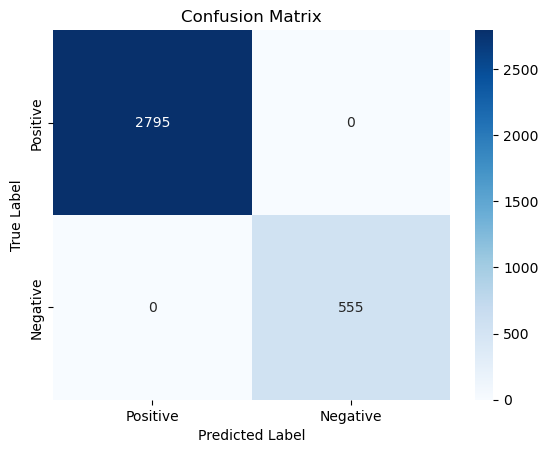

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the validation set
y_pred = model.predict(train_ds).round().astype(np.int)
# Get the true labels for the validation set
y_true = np.concatenate([y for x, y in train_ds], axis=0).astype(np.int)
print(y_true.shape, y_pred.shape)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_true)

# Define the class labels
class_names = ['Positive', 'Negative']

# Plot the heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names, ax=ax)

# Set the axis labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [34]:
# Test model
import cv2
import cv2
test_img = cv2.imread('/home/dagar/val/Tuberculosis/Tuberculosis-99.png')

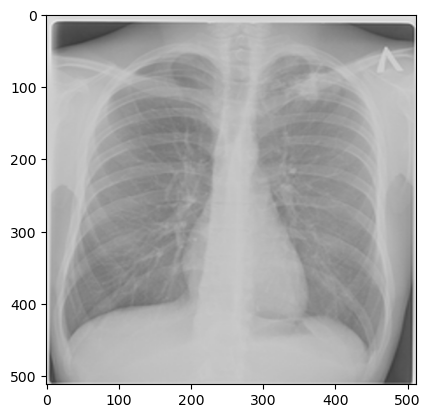

In [35]:
plt.imshow(test_img)

In [36]:
test_img.shape

(512, 512, 3)

In [37]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [38]:
model.predict(test_input)

1/1 [==============================] - 0s 48ms/step


array([[1.]], dtype=float32)